<div align="center">
<img src="data/RAUGM_horizontal.png" width="90%"/>
</div> 


<div align="center">
<h1> <srong> Curso CU06 </srong></h1>
    <h4> Instuctores: </h4>
    <h3> Pedro Damián Cruz Santiago </h3>
    <h3> Dulce Rosario Herrera Moro </h3>
    <br>
</div> 

# Caso de uso 2: Consulta de mediciones de calidad del aire

Este notebook utiliza el paquete **aire.zmvm** descrito en https://hoyodesmog.diegovalle.net/aire.zmvm/index.html . El paquete contiene funcciones para descargar datos de las estaciones de medición de contaminantes viento y temperatura de la red de estaciones de la Secretaría del Medio Ambiente (SEDEMA) en la Zona Metropolitana del Valle de México. 


En la siguiente tabla se muestran las variables que se pueden descargar con la herramienta. Los datos estan disponibles desde 1986.


|  Variable   | Descripción                                  | 
|-------------|----------------------------------------------|
| SO2         | Dióxido de azufre (ppb)                      |
| CO          | Monóxido de Carbono (ppb)                    | 
| NOX         | Óxidos de nitrógeno (ppb)                    | 
| NO2         | Dióxido de nitrógeno (ppb)                   |
| NO          | Óxido nítrico (ppb)                          |
| O3          | Ozono (ppb)                                  |
| PM10        | Partículas de 10 micrómetros o menos  µg/m3  | 
| PM25        | Partículas de 2.5 micrómetros o menos µg/m3  |
| WSP         | Velocidad del viento (m/s)                   |
| WDR         | Dirección del viento (grados)                |
| TMP         | Temperatura (grados Celsius)                 |
| HR          | Humedad relativa (porcentaje)                |





Algunas de las funciones descargan las variables de todas las estaciones mientras que en otras se puede especificar la zona geográfica en la que se encuentran las estaciones deseadas.




<div align="center">
<img src="data/areas_airq.png"/>
</div> 


## Valores  máximos de Ozono  2009-2021

## 1. Carga de paquetes

Para la carga de paquetes se utiliza la función **library** a la que se le pasa como argumento el nombre del paquete deseado.

In [1]:
library(dplyr) 
library(aire.zmvm)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(ggplot2)
library(ggseas)
library(magrittr)


## 2. Descarga de datos

 En este caso, utiliza la función *get_station_data* para la descarga de mediciones máximas diarias de (O3) de todas las estaciones de la red para el periodo de 2009 a 2021. La opción *criterion* permite especificar si se requieren los valores  máximos diarios, mínimos diarios o promedios horarios. 

In [3]:
o3 <- get_station_data(criterion = "MAXIMOS", 
                       pollutant = "O3", 
                       year = 2009:2021)


La función *kable()* en *knitr* es un generador de tablas muy simple y tiene un diseño simple. Las funciones *head* y *tail* devuelven la primera y la última parte de una matriz. En la siguiente celda se usan las funciones anteriores para visualizar los datos descargados.

In [4]:
knitr::kable(head(o3))
knitr::kable(tail(o3))



|date       |station_code |pollutant |unit | value|
|:----------|:------------|:---------|:----|-----:|
|2009-01-01 |ACO          |O3        |ppb  |    67|
|2009-01-02 |ACO          |O3        |ppb  |    71|
|2009-01-03 |ACO          |O3        |ppb  |   112|
|2009-01-04 |ACO          |O3        |ppb  |    91|
|2009-01-05 |ACO          |O3        |ppb  |    70|
|2009-01-06 |ACO          |O3        |ppb  |    71|



|       |date       |station_code |pollutant |unit | value|
|:------|:----------|:------------|:---------|:----|-----:|
|196127 |2021-12-26 |XAL          |O3        |ppb  |    NA|
|196128 |2021-12-27 |XAL          |O3        |ppb  |    NA|
|196129 |2021-12-28 |XAL          |O3        |ppb  |    NA|
|196130 |2021-12-29 |XAL          |O3        |ppb  |    NA|
|196131 |2021-12-30 |XAL          |O3        |ppb  |    NA|
|196132 |2021-12-31 |XAL          |O3        |ppb  |    NA|

## 3. Máximos diarios

En las siguiente celda se usan la funciones  *group_by*  para obtener agrupar todas las mediciones con la misma fecha y aplicarles una operacion con *summarise*, en este caso la operación obtiene el valor máximo.

In [5]:
o3_max <- o3 %>%
  group_by(date) %>%
  summarise(max = ifelse(all(is.na(value)),
                         NA,
                         base::max(value, na.rm = TRUE))) %>%
  na.omit()

In [6]:
knitr::kable(head(o3_max))
knitr::kable(tail(o3_max))



|date       | max|
|:----------|---:|
|2009-01-01 |  90|
|2009-01-02 |  94|
|2009-01-03 | 145|
|2009-01-04 | 148|
|2009-01-05 |  85|
|2009-01-06 |  81|



|date       | max|
|:----------|---:|
|2021-12-26 |  90|
|2021-12-27 |  93|
|2021-12-28 | 113|
|2021-12-29 |  84|
|2021-12-30 | 127|
|2021-12-31 | 145|

## 4. Definición de umbrales

Se define la tabla **contingencia_levels** con los umbrales de ozono para declarar 'alerta de smog' y las fechas en que estuvieron vigentes.

In [7]:

contingencia_levels <- data.frame(ppb = c(216, 210, 205, 199, 185, 155, 155),
  start = c(2009, 2009.4973, 2010.4973, 2011.5795,
            2012.6052,  2016.291, 2016.4986),
  end = c(2009.4973, 2010.4945, 2011.4945,
          2012.6025,    2016.2883, 2016.4959, Inf))

In [8]:
print(contingencia_levels)

  ppb    start      end
1 216 2009.000 2009.497
2 210 2009.497 2010.495
3 205 2010.497 2011.495
4 199 2011.580 2012.602
5 185 2012.605 2016.288
6 155 2016.291 2016.496
7 155 2016.499      Inf


In [9]:

max_daily_df <- tsdf(ts(o3_max$max, start = c(2009,1), frequency = 365.25))


In [10]:
knitr::kable(head(max_daily_df))
knitr::kable(tail(max_daily_df))



|        x|   y|
|--------:|---:|
| 2009.000|  90|
| 2009.003|  94|
| 2009.005| 145|
| 2009.008| 148|
| 2009.011|  85|
| 2009.014|  81|



|     |        x|   y|
|:----|--------:|---:|
|4743 | 2021.983|  90|
|4744 | 2021.986|  93|
|4745 | 2021.988| 113|
|4746 | 2021.991|  84|
|4747 | 2021.994| 127|
|4748 | 2021.997| 145|

In [11]:
contingencia <- o3_max

In [12]:
contingencia$date <- max_daily_df$x
contingencia$contingencia <- case_when(
  contingencia$date > 2012.6052 & contingencia$max > 185 ~ TRUE,
  contingencia$date > 2016.291 & contingencia$max > 155 ~ TRUE,
  TRUE ~ FALSE
)

In [13]:
knitr::kable(head(contingencia))
knitr::kable(tail(contingencia))



|     date| max|contingencia |
|--------:|---:|:------------|
| 2009.000|  90|FALSE        |
| 2009.003|  94|FALSE        |
| 2009.005| 145|FALSE        |
| 2009.008| 148|FALSE        |
| 2009.011|  85|FALSE        |
| 2009.014|  81|FALSE        |



|     date| max|contingencia |
|--------:|---:|:------------|
| 2021.983|  90|FALSE        |
| 2021.986|  93|FALSE        |
| 2021.988| 113|FALSE        |
| 2021.991|  84|FALSE        |
| 2021.994| 127|FALSE        |
| 2021.997| 145|FALSE        |

## 5. Generación de gráficas

Las líneas rojas en la gráfica indican los valores necesarios para activar una alerta de smog de fase 1. Las líneas azules son el promedio móvil de 30 días y los puntos rojos indican cuando el valor de ozono supera el necesario para declarar una alerta de contaminación.

In [14]:
options(repr.plot.width=15, repr.plot.height=8)

Warning message:
“Removed 29 row(s) containing missing values (geom_path).”


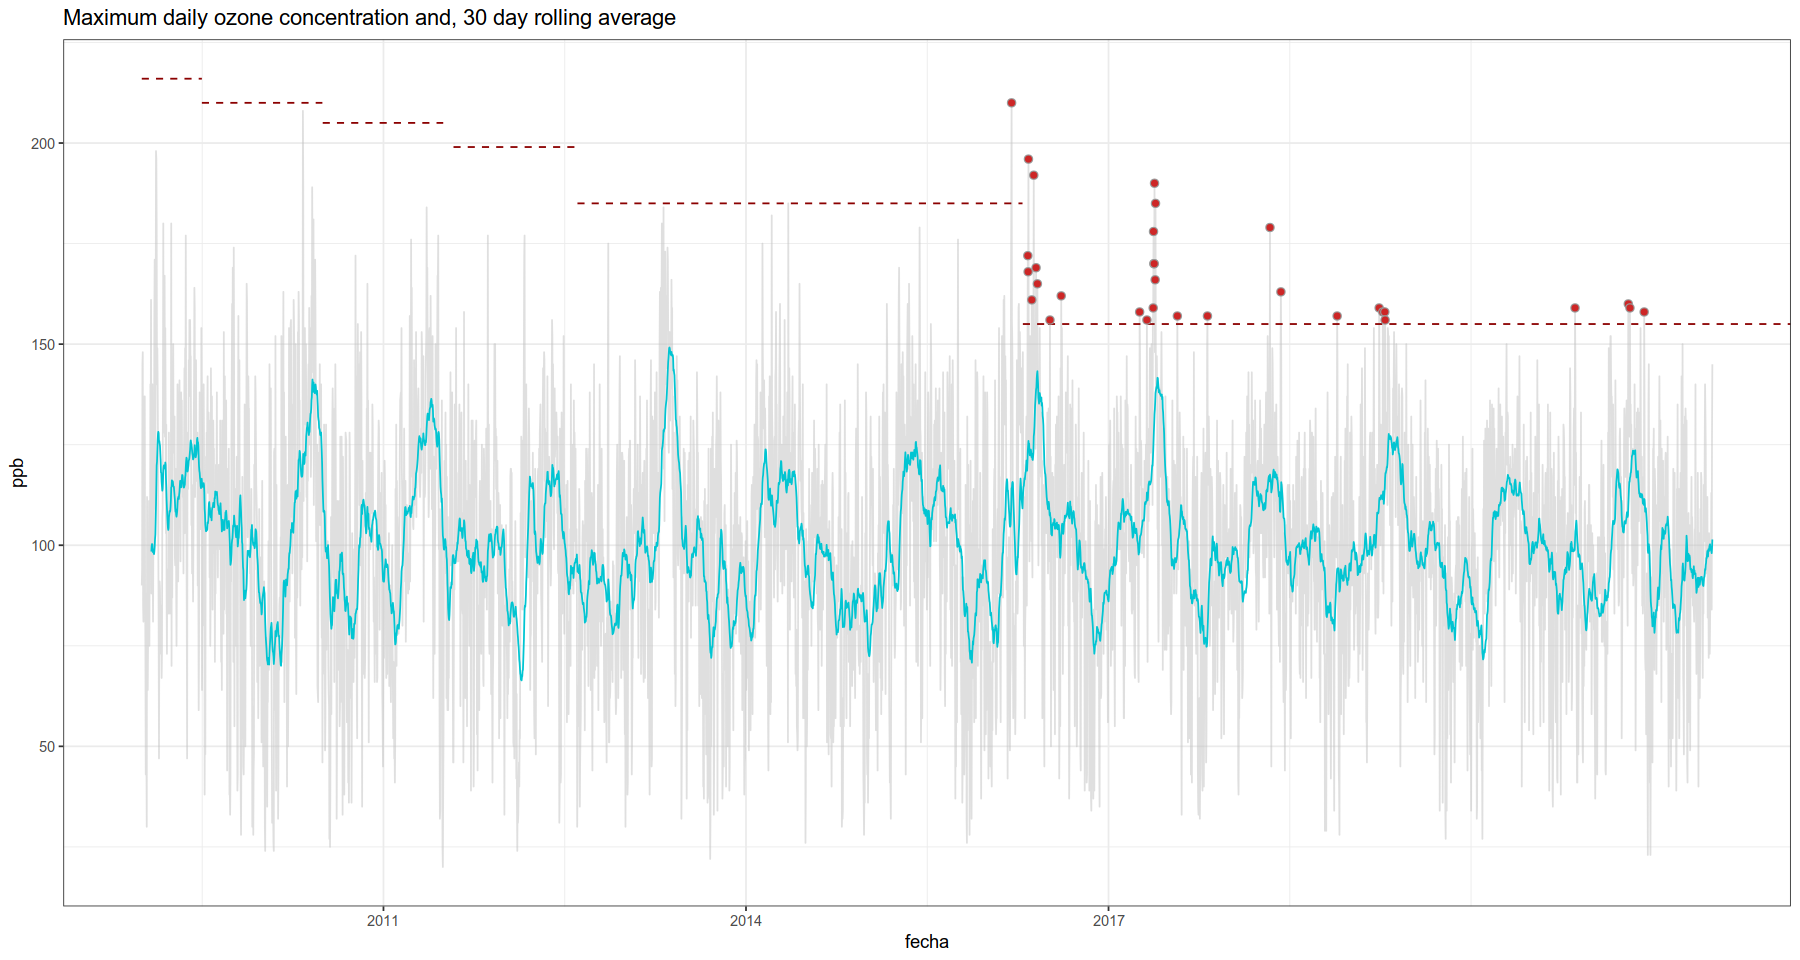

In [16]:
ggplot(max_daily_df,
       aes(x = x, y = y)) +
  geom_line(colour = "grey75", alpha = .5) +
  stat_rollapplyr(width = 30, align = "right", color = "#01C5D2") +
  geom_segment(data = contingencia_levels,
               aes(x=start, y=ppb, xend=end, yend=ppb), color="darkred",
               linetype = 2)  +
  geom_point(data=filter(contingencia, contingencia == TRUE),
             aes(x=date, y=max), color = "#999999",
             size = 2, shape = 21, fill = "firebrick3" ) +
  xlab("fecha") +
  ylab("ppb") +
  scale_x_continuous(breaks = c(2011, 2014, 2017)) +
  ggtitle("Maximum daily ozone concentration and, 30 day rolling average") +
  theme_bw()

## Referencias


- https://www.r-project.org/other-docs.html
- https://hoyodesmog.diegovalle.net/aire.zmvm/index.html
- http://www.aire.cdmx.gob.mx/descargas/ultima-hora/calidad-aire/pcaa/pcaa-modificaciones.pdf
